0.0
1.0
0.24197072451914337


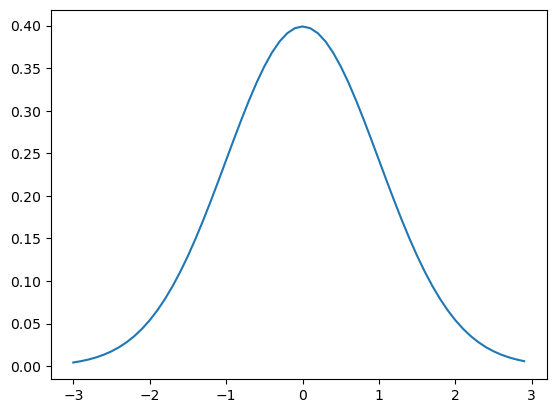

In [71]:
# 평균이 0이고 표준편차가 1인 정규 분포를 설정
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

sn = stats.norm(loc=0, scale=1)
print(sn.mean())
print(sn.std())
print(sn.pdf(x=1))

x_plot = np.arange(-3.0,3.0,0.1)
plt.plot(x_plot,stats.norm.pdf(loc=0,scale=1,x=x_plot))

<AxesSubplot:ylabel='Density'>

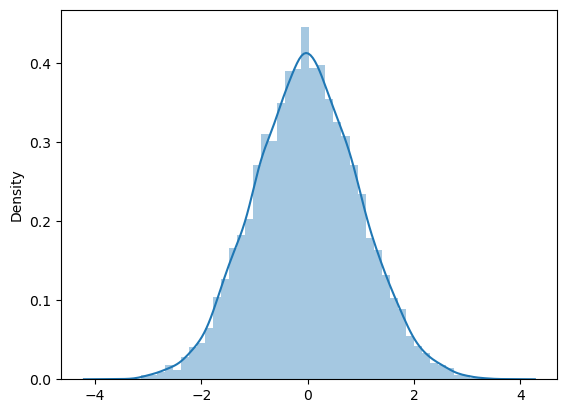

In [72]:
# 평균 0, 표준편차 1인 정규 분포에서 10,000개의 랜덤 표본을 생성
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sn = stats.norm.rvs(loc=0,scale=1,size=10000)
sn.mean()
sn.std()
sns.distplot(sn)

<AxesSubplot:ylabel='Density'>

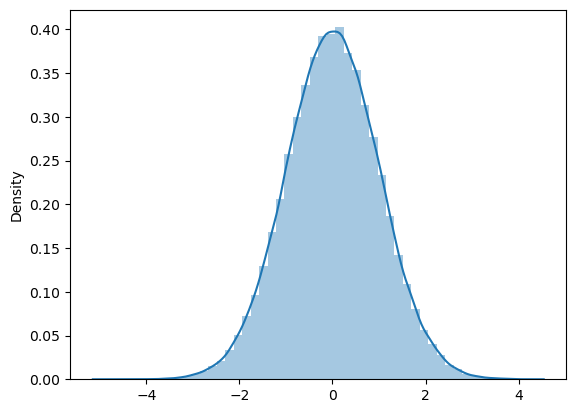

In [73]:
# 표준 정규 분포(평균이 0이고 표준편차가 1인 정규 분포)에서 100,000개의 랜덤 표본을 생성
nr = np.random.randn(100000)
sns.distplot(nr)

<AxesSubplot:>

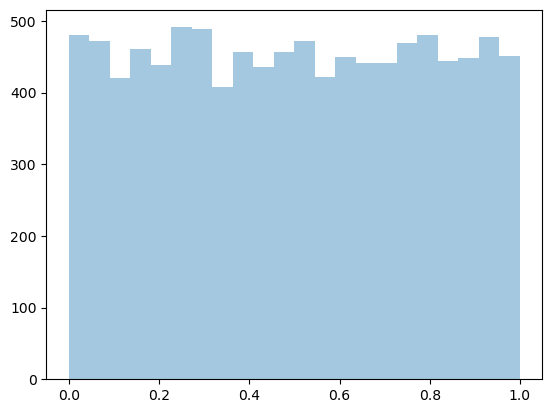

In [74]:
nr1 = np.random.rand(10000)
sns.distplot(nr1,kde=False)

기계 학습 알고리즘은 종종 입력 데이터를 2차원 배열 형태로 받습니다. 일반적으로 각 행(row)은 개별 샘플(sample)을 나타내고, 각 열(column)은 특성(feature)을 나타냅니다.

이 경우 X는 100x1의 2차원 배열입니다. 100은 데이터의 샘플 개수를 나타내고, 1은 특성의 개수를 나타냅니다. 즉, 이 데이터 세트에는 100개의 샘플과 1개의 특성이 있습니다.

만약 X를 1차원 배열로 만든다면, 그것은 100개의 원소를 가진 배열이 될 것입니다. 이것은 여전히 100개의 샘플을 나타냅니다만, 이는 대부분의 기계 학습 알고리즘에 직접적으로 입력으로 사용될 수 없습니다. 그 이유는 대부분의 알고리즘이 예상하고 있는 데이터의 형태가 각 샘플의 특성들을 포함하는 2차원 배열이기 때문입니다.

따라서 X를 2차원 배열로 만드는 이유는 이러한 기계 학습 알고리즘과의 호환성을 유지하기 위한 것입니다.

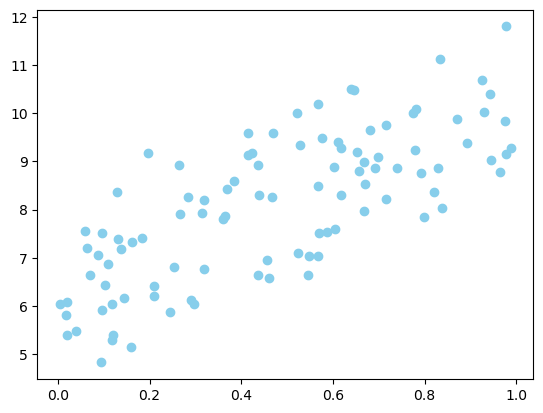

In [88]:
import pandas as pd

np.random.seed(0)
X = np.random.rand(100,1) # 0과 1 사이의 균일 분포(uniform distribution)에서 무작위 실수를 생성
y = 6 + 4*X+np.random.randn(100,1)
# y = 6 + 4*X
plt.scatter(X,y,c='skyblue')

In [76]:
# 경사하강(교재 : page 294 ~ 300)
import webbrowser
webbrowser.open('https://angeloyeo.github.io/2020/08/16/gradient_descent.html')

True

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다. 
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [77]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

In [78]:
# 반복적으로 경사 하강법을 이용하여 get_weight_update()를 호출하여 w1과 w0를 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.

def gradient_descent_steps(X,y,iters=10000):
    # w0, w1을 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [79]:
# 에측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.4f} w0:{1:.4f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('GD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.7740 w0:6.3047
GD Total Cost:0.9947


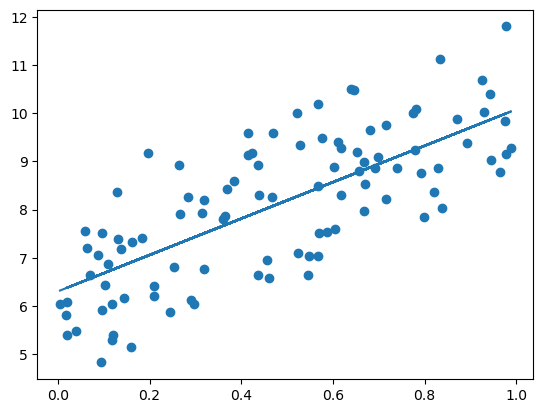

In [80]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [81]:
# np.random.pernutation()
X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(X.shape)
random_index = np.random.permutation(X.shape[0])
X_random = X[random_index]
X_random

(4, 3)


array([[ 7,  8,  9],
       [ 4,  5,  6],
       [ 1,  2,  3],
       [10, 11, 12]])

In [82]:
# Q. 미니배치확률적 경사하강법으로 W0, W1 및 예측 오류비용을 계산하세요.

In [89]:
# 확률적 경사 하강법 : 대용량 데이터의 경우 일부 데이터만 이용해 w가
# 업데이트되는 값을 계산, 경사 하강법에 비해서 빠른 속도 보장
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
def stochastic_gradient_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update
        # 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [90]:
# 확률적 경사 하강법 : 대용량 데이터의 경우 일부 데이터만 이용해 w가 
# 업데이트되는 값을 계산, 경사 하강법에 비해서 빠른 속도 보장
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
def stochastic_gradient_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, 
        # sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 
        # 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,\
                                                 learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [91]:
w1, w0 = stochastic_gradient_steps(X,y,iters=1000) 
print('w1:',round(w1[0,0],3), 'w0:',round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('SGD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 3.79 w0: 6.291
SGD Total Cost:0.9942
